In [13]:
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

#create random data
np.random.seed(42)
sales_data = pd.DataFrame({
    "SalesID": range(1, 1001),
    "CustomerID": np.random.randint(1, 101, 1000),
    "ProductID": np.random.randint(1, 51, 1000),
    "Quantity": np.random.randint(1, 6, 1000),
    "SalesDate": pd.date_range(start='2024-01-01', freq='D', periods=1000).tolist(),
    "SalesAmount": np.random.uniform(10.0, 20.0, size=1000).round(2)
})

Customers_data = pd.DataFrame({
    "CustomerID": range(1, 101),  
    "Name": [f"Customer_{i:03}" for i in range(1, 101)],  
    "Gender": np.random.choice(["Female", "Male"], size=100),  # اختيار عشوائي للنوع
    "Age": np.random.randint(18, 65, size=100),  # أعمار عشوائية بين 18 و 65
    "Location": np.random.choice(['Cairo', 'Dubai', 'London', 'Paris'], size=100)  # اختيار عشوائي للموقع
})

products_data = pd.DataFrame({
    'ProductID': range(1, 51),
    'ProductName': [f'Product_{i}' for i in range(1, 51)],
    'Category': np.random.choice(['Electronics', 'Clothing', 'Books', 'Toys'], size=50),
    'Price': np.random.uniform(10.0, 300.0, size=50).round(2)
})



In [14]:
sales_data.to_csv(r'C:\Users\Bassam\Desktop\upwork\Project_2\generated data csv\Sales_data.csv', index=False)
Customers_data.to_csv(r'C:\Users\Bassam\Desktop\upwork\Project_2\generated data csv\Customers_data.csv', index=False)
products_data.to_csv(r'C:\Users\Bassam\Desktop\upwork\Project_2\generated data csv\Products_data.csv', index=False)



In [15]:
#SQL Server
connection = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=DESKTOP-TKTF0KT\SQLEXPRESS;'
    'DATABASE=SalesAnalysis;'
    'Trusted_Connection=yes;'
)
cursor=connection.cursor()

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Bassam\AppData\Local\Temp\ipykernel_23872\1144137775.py:4: SyntaxWarning: invalid escape sequence '\S'
  'SERVER=DESKTOP-TKTF0KT\SQLEXPRESS;'


In [ ]:
# Upload sales Data (SQL Server)
sales_data=pd.read_csv(r'C:\Users\Bassam\Desktop\upwork\Project_2\generated data csv\Sales_data.csv')

for _ , row in sales_data.iterrows(): 
 cursor.execute("""insert into Sales(SalesID,CustomerID,ProductID,Quantity,SalesDate,SalesAmount)
                Values(?,?,?,?,?,?)""",row['SalesID'],row['CustomerID'],row['ProductID'],row['Quantity'],row['SalesDate'],row['SalesAmount'])
 
#Upload Customers Data (SQL Server)

Customers_data=pd.read_csv(r'C:\Users\Bassam\Desktop\upwork\Project_2\generated data csv\Customers_data.csv')
for _ , row in Customers_data.iterrows():
 cursor.execute("""insert into Customers (CustomerID,Name,Gender,Age,Location)
                Values(?,?,?,?,?)""",row['CustomerID'],row['Name'],row['Gender'],row['Age'],row['Location'])

#Upload Products data (SQL Server) 
products_data=pd.read_csv(r'C:\Users\Bassam\Desktop\upwork\Project_2\generated data csv\Products_data.csv')
for _, row in products_data.iterrows():
 cursor.execute("""insert into Products (ProductID,ProductName,Category,Price)
                Values(?,?,?,?)""",row['ProductID'],row['ProductName'],row['Category'],row['Price'])

connection.commit()
cursor.close()
connection.close()


C:\Users\Bassam\AppData\Local\Temp\ipykernel_23872\3715329367.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql(query,connection)
C:\Users\Bassam\AppData\Local\Temp\ipykernel_23872\3715329367.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_yearly=data.groupby([pd.Grouper(key='SalesDate',freq='Y'),'Category']).agg({'TotalSales':'sum'}).reset_index()


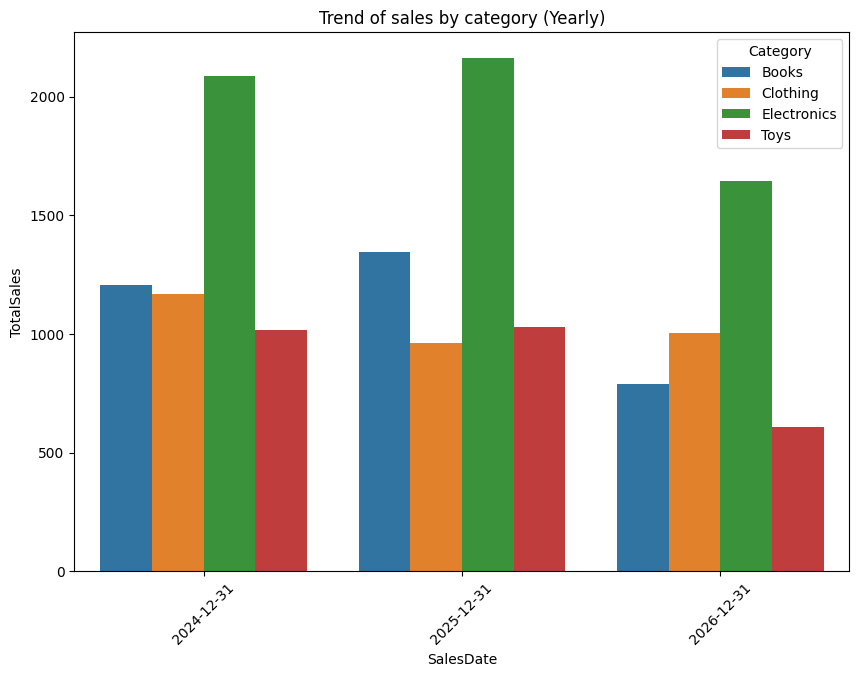

In [16]:
import pandas as pd
# Best-selling years by categories
query = """
SELECT s.SalesDate, c.Location, p.Category, SUM(s.SalesAmount) AS TotalSales
FROM Sales s
JOIN Customers c ON s.CustomerID = c.CustomerID
JOIN Products p ON s.ProductID = p.ProductID
GROUP BY s.SalesDate, c.Location, p.Category
ORDER BY s.SalesDate;
"""
data=pd.read_sql(query,connection)
data['SalesDate']=pd.to_datetime(data['SalesDate'])
data_yearly=data.groupby([pd.Grouper(key='SalesDate',freq='Y'),'Category']).agg({'TotalSales':'sum'}).reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(data=data_yearly, x='SalesDate', y='TotalSales', hue='Category')
plt.title("Trend of sales by category (Yearly)")
plt.xticks(rotation=45)
plt.savefig(r'C:\Users\Bassam\Desktop\upwork\Project_2\sales_trends_by_category.png',format='png',bbox_inches='tight')  
plt.show()


C:\Users\Bassam\AppData\Local\Temp\ipykernel_23872\2103578232.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)
C:\Users\Bassam\AppData\Local\Temp\ipykernel_23872\2103578232.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalSales", y="ProductName", data=top_products, palette="viridis")


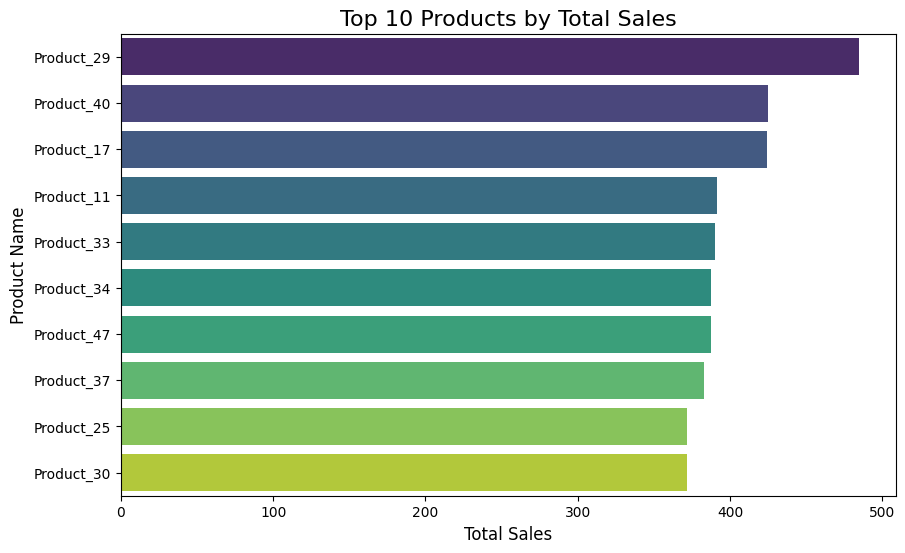

In [17]:
# Best-selling products

query = """
SELECT p.ProductName, SUM(s.SalesAmount) AS TotalSales
FROM Sales s JOIN Products p ON s.ProductID = p.ProductID
GROUP BY p.ProductName
ORDER BY TotalSales DESC;
"""
data = pd.read_sql(query, connection)


top_products = data.head(10)

plt.figure(figsize=(10, 6))   
sns.barplot(x="TotalSales", y="ProductName", data=top_products, palette="viridis")

plt.title("Top 10 Products by Total Sales", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.savefig(r'C:\Users\Bassam\Desktop\upwork\Project_2\top_10_products_by totalsales.png',format='png',bbox_inches='tight')  
plt.show()


C:\Users\Bassam\AppData\Local\Temp\ipykernel_23872\3990706144.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)
C:\Users\Bassam\AppData\Local\Temp\ipykernel_23872\3990706144.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby("AgeGroup")["TotalSales"].sum().reset_index()


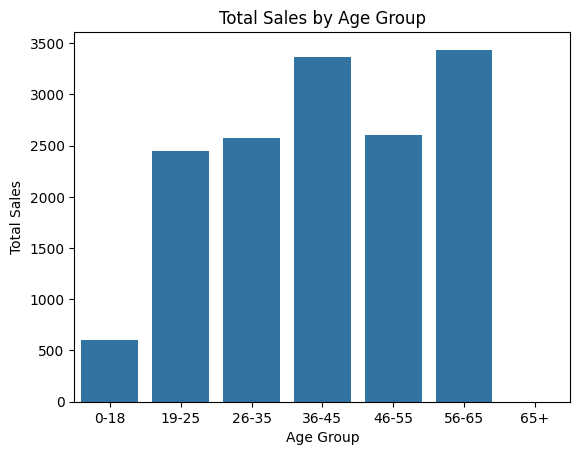

In [18]:

# Ages with the highest Purchases
query = """
SELECT c.Age, SUM(s.SalesAmount) AS TotalSales
FROM Sales s JOIN Customers c ON s.CustomerID = c.CustomerID
WHERE c.Age IS NOT NULL -- to remove null
GROUP BY c.Age
ORDER BY TotalSales DESC;
"""
data = pd.read_sql(query, connection)

# Splitting ages into Groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
data["AgeGroup"]=pd.cut(data["Age"],bins=bins,labels=labels,right=True)

# Grouping sales by age groups
grouped_data = data.groupby("AgeGroup")["TotalSales"].sum().reset_index()

sns.barplot(x="AgeGroup", y="TotalSales", data=grouped_data)
plt.title("Total Sales by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Sales")
plt.savefig(r'C:\Users\Bassam\Desktop\upwork\Project_2\total sales by age group.png',format='png',bbox_inches='tight')  
plt.show()
